In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

import matplotlib.image as mpimg
import numpy as np
import os

def showData(directory, img_id):
    file_names = [str(img_id) + x for x in ['_FLAIR.png', '_reg_IR.png', '_reg_T1.png', '_segm.png']]
    imgs = [mpimg.imread(os.path.join(directory, file_name)) for file_name in file_names]
    imgs[3] *= 255

    fig, axs = plt.subplots(2,2, sharey=True, figsize=(10,8))
    axs[0][0].set_title(file_names[0])
    axs[0][1].set_title(file_names[1])
    axs[1][0].set_title(file_names[2])
    axs[1][1].set_title(file_names[3])

    ax00 = axs[0][0].imshow(imgs[0], aspect="auto", cmap="gray")
    ax01 = axs[0][1].imshow(imgs[1], aspect="auto", cmap="gray")
    ax10 = axs[1][0].imshow(imgs[2], aspect="auto", cmap="gray")
    ax11 = axs[1][1].imshow(imgs[3], aspect="auto", cmap=plt.cm.get_cmap('tab10', 10), vmin=0, vmax=9)

    fig.colorbar(ax00, ax=axs[0][0])
    fig.colorbar(ax01, ax=axs[0][1])
    fig.colorbar(ax10, ax=axs[1][0])
    fig.colorbar(ax11, ax=axs[1][1])

    fig.suptitle(directory)
    plt.show()

    # for img in imgs:
    #     print(img_id, type(img), img.shape, 'min', (img).min(), 'max', (img).max())

    print(img_id, type(imgs[3]), imgs[3].shape, 'min', imgs[3].min(), 'max', imgs[3].max())

In [ ]:
# folders = ['{}_img'.format(x) for x in ['1', '5', '7', '4', '148', '070', '14']]
# folders = ['1', '5', '7', '4', '148', '070', '14']
folders = ['1']
for folder in folders:
    print(folder)
    # for i in range(19, 23)):
    for i in range(19, 23):        showData(directory='./datasets/BrainS18/'+folder, img_id=i)

In [ ]:
showData(directory='./datasets/BrainS18/1', img_id=20)

In [2]:
from brains18 import BrainS18Dataset
data = BrainS18Dataset(is_tumor=False)
print(len(data))

336


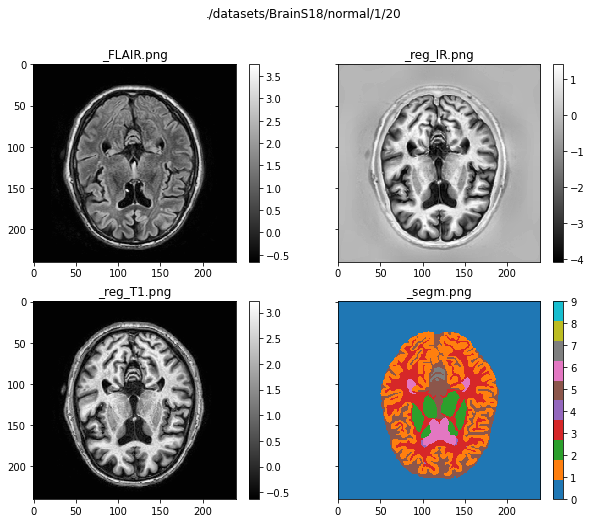

In [4]:
data.show_imgs(20)

In [5]:
data.get_class_weight()

[0.0010028988586319302,
 0.012891306298999134,
 0.21451479969439727,
 0.018072570615406566,
 0.28108452156979946,
 0.015737069706347428,
 0.15042111188754428,
 0.05237007537616631,
 0.25390564599270765]

In [ ]:
class_num, class_weight = data.get_class_weight()

In [ ]:
print(class_num, class_weight)
print(sum(class_weight))